# Project: Medical Appointment No Show

## 1. Introduction 
This [dataset](https://www.kaggle.com/joniarroba/noshowappointments) collects information from almost 100k medical appointments in Brazil and is **focused on the question of whether or not patients show up for their appointment.** A number of characteristics about the patient are included in each row.

* PatientId: Identification of a patient
* AppointmentID: Identification of each appointment
* Gender: Male or Female
* DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor
* DataAgendamento: The day someone called or registered the appointment
* Age: How old is the patient
* Neighbourhood: Where the appointment takes place
* Scholarship: True or False, indicates if the patient is in the Bolsa Familia program
* Hipertension: True or False
* Diabetes: True or False
* Alcoholism: True or False
* Handcap: True or False
* SMS_received: 1 or more messages sent to the patient
* No-show "No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up


In [1]:
# first let's add important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import data from the file
df = pd.read_csv("KaggleV2-May-2016.csv")

In [2]:
#Check how the data looks like
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Check from which time periods these apointments are from
df.AppointmentDay.min(), df.AppointmentDay.max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

In [4]:
# Check the shape of our data
df.shape

(110527, 14)

In [5]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Check missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# Check unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
# Check numerical attributes
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


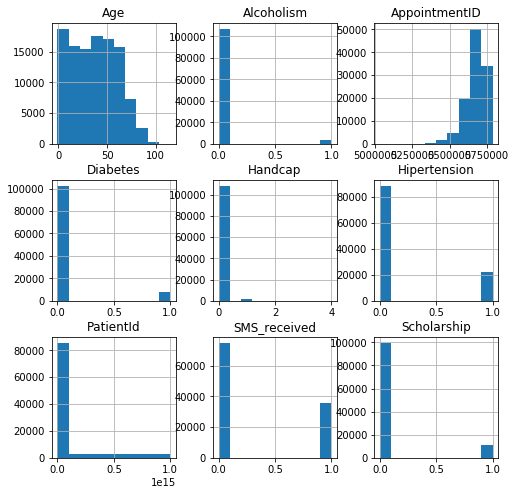

In [9]:
# Observing data through visualization
df.hist(figsize=(8,8));

# Observations
* We have 110,527 rows who are represnting our patients whereas 14 columns are patient's aattributes.
* These appointments are of 2 months from '2016-04-29' to '2016-06-08'.
* Avereage age of the patients is approximately 37.
* 9 percent of the patients does not have a scholarship
* On average patients suffers from, _Hipertension_ 19%, _Diabetes_ 7%, _Alcoholism_ 3% and _handicap_ 2%. 


# Questions
The questions that comes into my mind after my observation so far:

- The most important factor that is influencing the patient to no showing the medical appointment?
- Relation between variables that can lead us to some special kind of people or group?
- Which months or days influences mostly on patient not showing up for the appointment?
- Does the waiting time influenced on not showing up for the appointment?
- Is there any specific gender who is not showing up for the appointment?


## Data Wrangling

Analyzing data and trying to figure out which values, variables or columns can be fixed. Figuring out missing, weird and duplicated values.


In [10]:
# checking for general data duplicates
df.duplicated().sum()

0

In [11]:
# checking for Patient Id duplicates
df.PatientId.duplicated().sum()

48228

### Patient Id 
This is an important variable, as we can see patients have tried making new appointments as well.

In [12]:
# checking for Appointment ID duplicates
df.AppointmentID.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [14]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Observations after data wrangling

As we can see we can most of the values are in a good shape, means we dont have much to do with these, but still we can fix few things:

- We can fix data types of ScheduledDay and AppointmentDay
- PatientId can be converted into strings
- AppointmentId is not needed
- Handcap values need to have a closer look as you can see [here](https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356). It has a range of values from 0 to 4, which tells us about how many disablities one patient have.
- Removing negative values in age column

## Data Cleaning

We will start from fixing things we have mentioned above in our observations.

In additiont to that we will:
- rename the coulums for fixing typos
- formating Handcap, as we only need to know if someone is Handicapped or not.
- adding new column of waiting time, as it might help us in figuring out, how much this factors effect not showing up for the appointment.


In [15]:
# removing appointmentID column
df.drop(['AppointmentID'], axis=1, inplace=True)
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [16]:
# renaming all columns to fix typos for simple exploration
df.rename(columns={'PatientId': 'patient_id', 'ScheduledDay': 'scheduled_day', 'AppointmentDay': 'appointment_day', 'SMS_received': 'received_sms', 'No-show': 'no_show', 'Handcap': 'handicap' }, inplace=True)
df.rename(columns=lambda x: x.lower(), inplace=True)
df.columns

Index(['patient_id', 'gender', 'scheduled_day', 'appointment_day', 'age',
       'neighbourhood', 'scholarship', 'hipertension', 'diabetes',
       'alcoholism', 'handicap', 'received_sms', 'no_show'],
      dtype='object')

In [17]:
# formatting patient_id to string
df.patient_id = df.patient_id.apply(lambda patient: str(int(patient)))

In [18]:
# formatting the date time 'scheduled_day' and 'appointment_day' columns
# i'm just testing different forms of time conversion here
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = pd.to_datetime(df.appointment_day)   

df.scheduled_day.head(1), df.appointment_day.head(1)

(0   2016-04-29 18:38:08+00:00
 Name: scheduled_day, dtype: datetime64[ns, UTC],
 0   2016-04-29 00:00:00+00:00
 Name: appointment_day, dtype: datetime64[ns, UTC])

In [19]:
# Removing the record with negative Age
df[df['age'] < 0].index
df.drop(df[df['age'] < 0].index, inplace=True)

In [20]:
# Converting handicap variable values to 0 and 1
df.loc[df.handicap > 1, 'handicap'] = 1
df.handicap.unique()

array([0, 1])

In [21]:
# creating a new column "appointment_waiting_time"
df["appointment_waiting_days"] = df.appointment_day - df.scheduled_day
df.appointment_waiting_days.head()

#converting weird values of this column into absolute values
df.appointment_waiting_days = df.appointment_waiting_days.abs().dt.days


In [22]:
df['month'] = df['appointment_day'].dt.month_name()
df['day'] = df['appointment_day'].dt.day_name()

In [23]:
#Lets have a look how our data looks like now
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,no_show,appointment_waiting_days,month,day
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,April,Friday
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,April,Friday
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,April,Friday
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,April,Friday
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,April,Friday


## Exploratory Data Analysis

In [24]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,appointment_waiting_days
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,9.532915
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,15.027724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178.000000


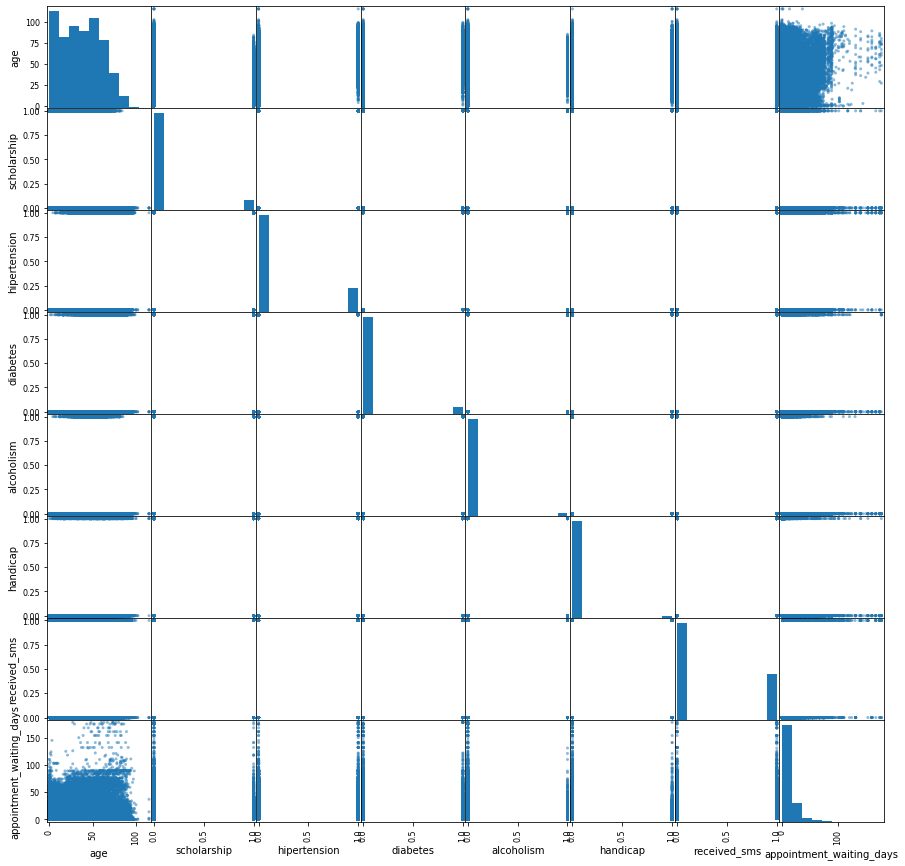

In [25]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

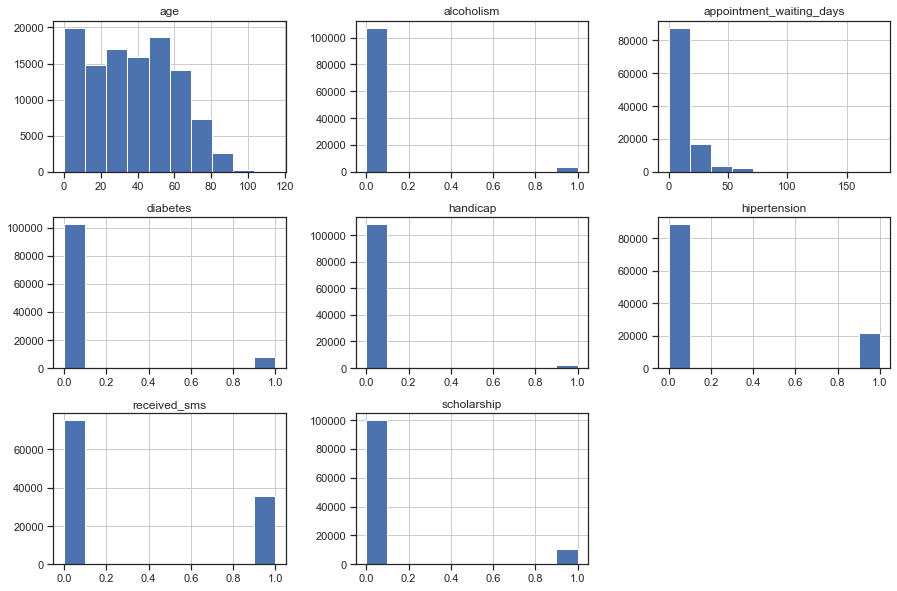

In [26]:
sns.set(style="ticks")

df.hist(figsize=(15,10));

As we can clearly see here:
- most of the patients are less than 70 years of age
- patients with alocholism were lesser than diabetes whereas hipertension seems to be more common with patient
- most of the patient did not recieve messages as compare to the one who recieved it
- very few patients has scholarship

We will have to choose these numerical varaiables to explore more to get to the bottom of the problem:
- age 
- appointment_waiting_time
- sms

Whereas we can explore the above mentioned variable with mixing it up with the categorical variables given below:
- gender 
- patient_id
- neighbourhood
- month and day



In [27]:
df.shape

(110526, 16)

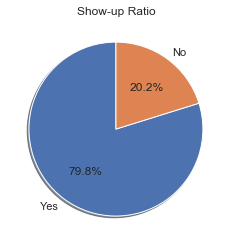

In [28]:
temp = df['no_show'].value_counts()
x_marker = ['Yes', 'No']
plt.pie(temp, labels = x_marker, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Show-up Ratio');

This figure show us:
- 79.8% of the patient show up wheras,
- 20.2% patients does not show up for the appointment.

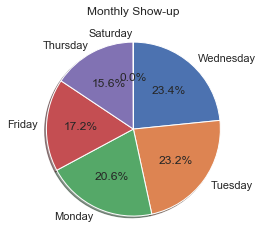

In [29]:
temp = df['day'].value_counts()
# .to_list()
x_marker = df['day'].value_counts().index.tolist()
plt.pie(temp, labels = x_marker, autopct='%1.1f%%', shadow=True, startangle=90,counterclock=False)
plt.title('Monthly Show-up');

This figure show us:
- Patients have appointments throughout the week, whereas
- the number of appointments in the start of the week are higher and decreases going down to Friday, and
- there are no appointments on saturday

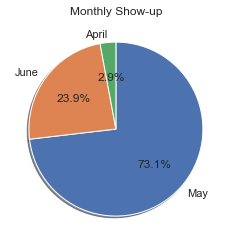

In [30]:
temp = df['month'].value_counts()
# .to_list()
x_marker = df['month'].value_counts().index.tolist()
plt.pie(temp, labels = x_marker, autopct='%1.1f%%', shadow=True, startangle=90,counterclock=False)
plt.title('Monthly Show-up');

This figure show us:
- that according to our dataset most of the patients had an appointmnet in May, then in June and very few in April


## Answering Questions

### Relation between variables that can lead us to some special kind of people or group?

We have also tried to group few variables to get some insight:



- day and gender

- month and gender

- sms and gender



- waiting time and no show

- age and no show

- neighnourhood and no show

- month and no show 

- days and no show


### Is there any specific gender who is not showing up for the appointment?

We explored days and months with gender and sms with gender to get an idea if Gender has any role to play in not showing for the appointment.

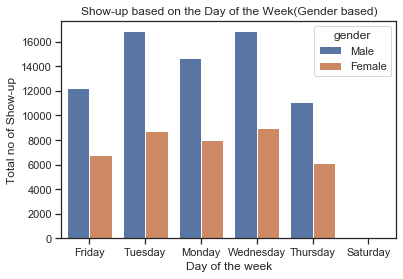

In [31]:
df.groupby('day').count()

sns.countplot(data=df, x='day', hue='gender');
plt.legend(['Male','Female'], title='gender');
plt.xlabel('Day of the week')
plt.ylabel('Total no of Show-up')
plt.title('Show-up based on the Day of the Week(Gender based)');


This figure show us:
- Patients have appointments throughout the week, whereas
- the number of appointments in the start of the week are higher and decreases going down to Friday, and
- there are no appointments on saturday

In addition to that:
- we can clearly see the male patients are higher in number through out the week in comparison to female patients.


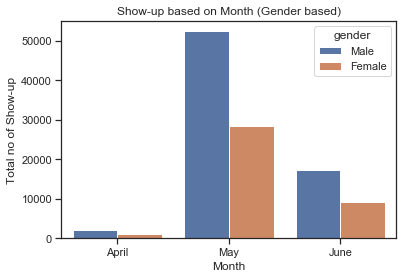

In [32]:
df.groupby('month').count()

sns.countplot(data=df, x='month', hue='gender');
plt.legend(['Male','Female'], title='gender');
plt.xlabel('Month')
plt.ylabel('Total no of Show-up')
plt.title('Show-up based on Month (Gender based)');


This figure show us:
- that according to our dataset most of the patients had an appointmnet in May, then in June and very few in April

In additio to that:
- if we group gender with the number of patients monthly,
- we can see that the difference between the number of male patients and the female patient is high in May, which decrease in June and April.


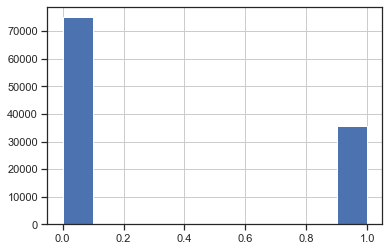

In [33]:
df['received_sms'].hist();

This figure show us:
- a lot of patients did not receive any sms

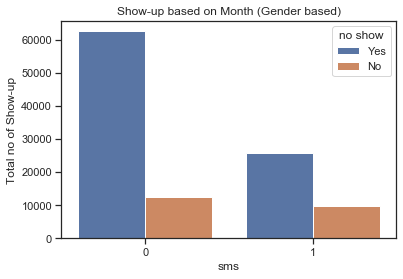

In [34]:
df.groupby('received_sms').count()

sns.countplot(data=df, x='received_sms', hue='no_show');
plt.legend(['Yes','No'], title='no show');
plt.xlabel('sms')
plt.ylabel('Total no of Show-up')
plt.title('Show-up based on Month (Gender based)');



This figure show us:
- a lot of patients did not receive any sms and by grouping it with gender does not change the stats.

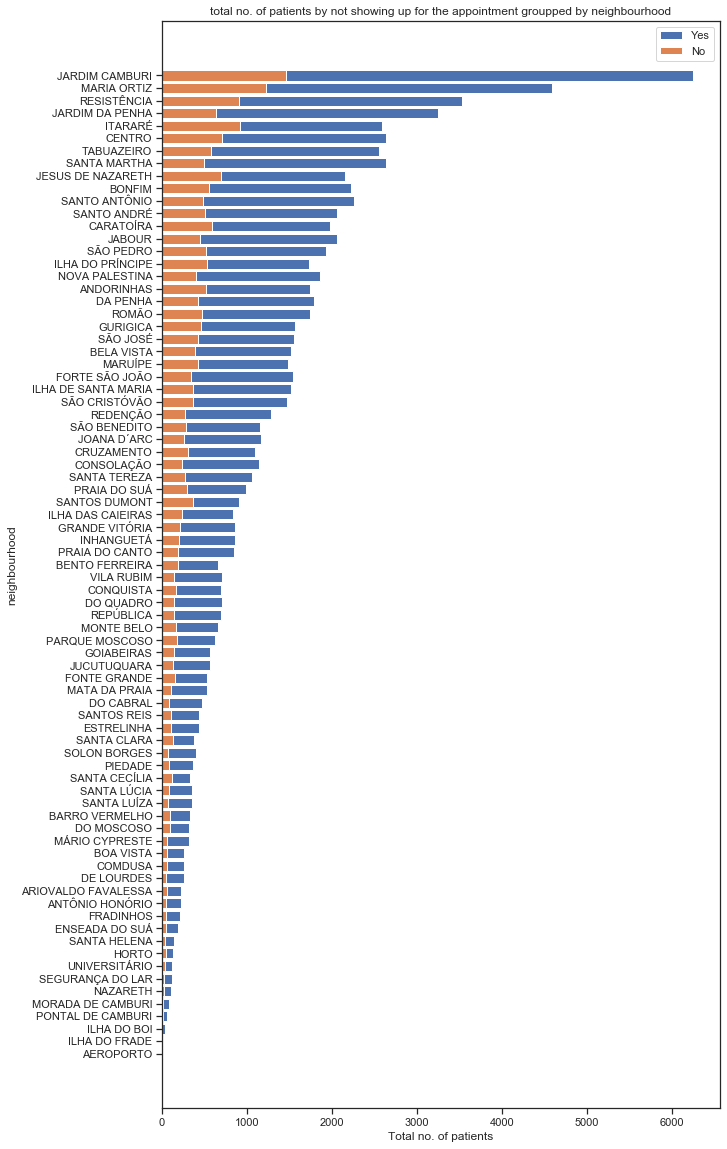

In [35]:
neighborhood_groupped = df.groupby(['neighbourhood', 'no_show']).count().unstack().patient_id
neighborhood_groupped["sum"] = neighborhood_groupped['No'] + neighborhood_groupped['Yes']
neighborhood_groupped.sort_values(by="sum", inplace=True)
neighborhood_groupped.dropna(inplace=True)

# plotting our data
plt.figure(figsize=(10, 20))

# bar chart
plt.barh(neighborhood_groupped.index, neighborhood_groupped['No'].values)
plt.barh(neighborhood_groupped.index, neighborhood_groupped['Yes'].values)

# configs
plt.xlabel("Total no. of patients")
plt.ylabel("neighbourhood")
plt.legend(["Yes", "No"])

plt.title("total no. of patients by not showing up for the appointment groupped by neighbourhood")

plt.show();

This figure show us:
- that there are few neighbourhood, from where people comes in large number for appointments and
- it is hard to identify which thing is affecting to not showing up for the appointment.

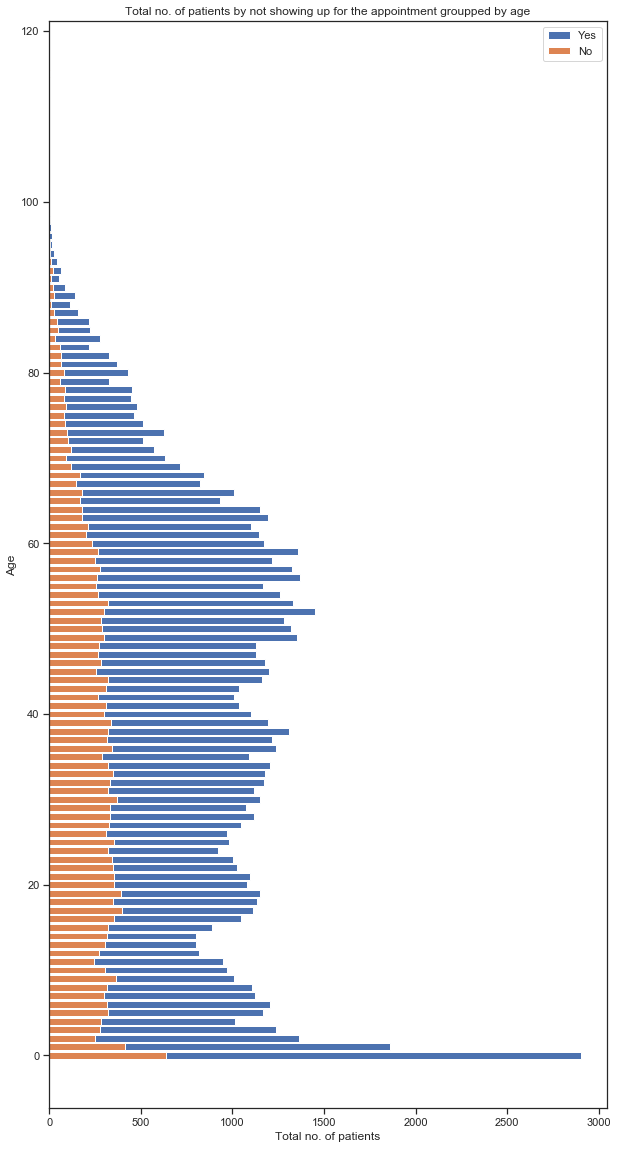

In [36]:
age_groupped = df.groupby(['age', 'no_show']).count().unstack().patient_id
age_groupped["sum"] = age_groupped['No'] + age_groupped['Yes']
age_groupped.sort_values(by="sum", inplace=True)
age_groupped.dropna(inplace=True)

# plotting our data
plt.figure(figsize=(10, 20))

# bar chart
plt.barh(age_groupped.index, age_groupped['No'].values)
plt.barh(age_groupped.index, age_groupped['Yes'].values)

# configs
plt.xlabel("Total no. of patients")
plt.ylabel("Age")
plt.legend(["Yes", "No"])

plt.title("Total no. of patients by not showing up for the appointment groupped by age")

plt.show();

This figure show us:
- that older people tend to show up for the appointment as compare to younger people.

### Does the waiting time influenced on not showing up for the appointment?

We grouped waiting time with the patients who are showing or not at the appointment to get an insight as well.

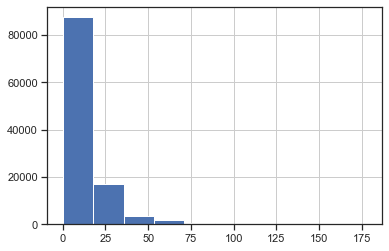

In [37]:
df['appointment_waiting_days'].hist();

This figure show us:
- that waiting time is less than 3 days for most of the people,
- and very few have to wait for more than 20 days of waiting.

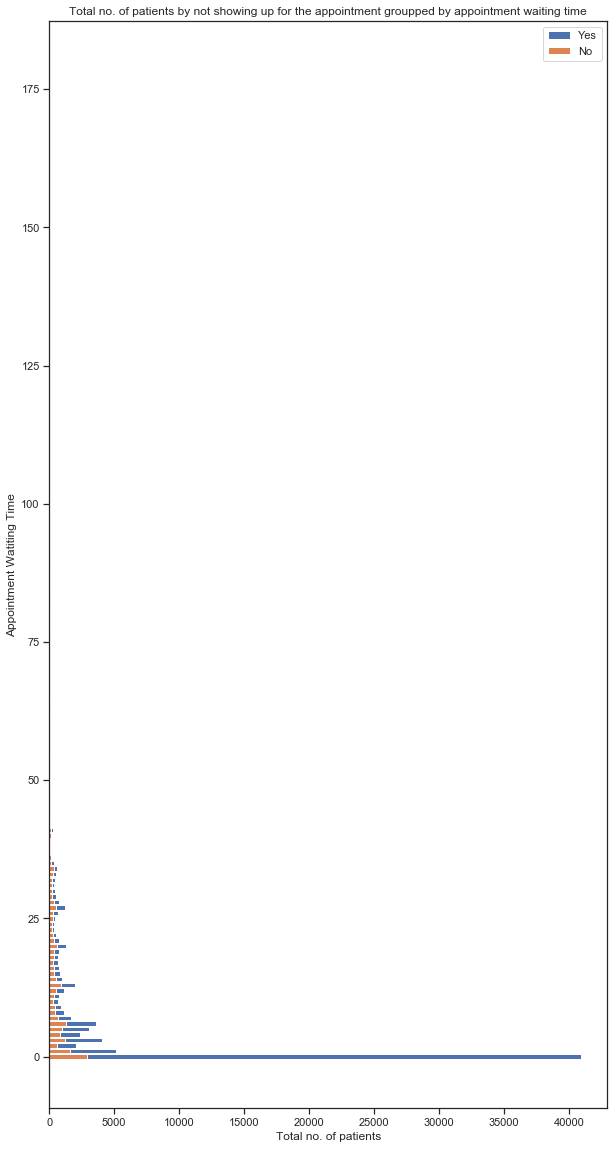

In [38]:
waiting_time_groupped = df.groupby(['appointment_waiting_days', 'no_show']).count().unstack().patient_id
waiting_time_groupped["sum"] = waiting_time_groupped['No'] + waiting_time_groupped['Yes']
waiting_time_groupped.sort_values(by="sum", inplace=True)
waiting_time_groupped.dropna(inplace=True)

# plotting our data
plt.figure(figsize=(10, 20))

# bar chart
plt.barh(waiting_time_groupped.index, waiting_time_groupped['No'].values)
plt.barh(waiting_time_groupped.index, waiting_time_groupped['Yes'].values)

# configs
plt.xlabel("Total no. of patients")
plt.ylabel("Appointment Watiting Time")
plt.legend(["Yes", "No"])

plt.title("Total no. of patients by not showing up for the appointment groupped by appointment waiting time")

plt.show();

### Which months or days influences mostly on patient not showing up for the appointment?

We can see in the figure below:
- that the number of patients showing up or not, monthly and day wise. 
- that most of the patients applied for May, then June and very few in April.
- that most of numbers of patients come in working days and wednesday is the day with the maximum numbers geeting appointmnet.


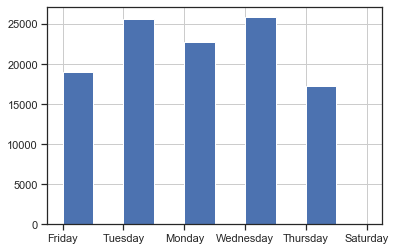

In [39]:
df['day'].hist();

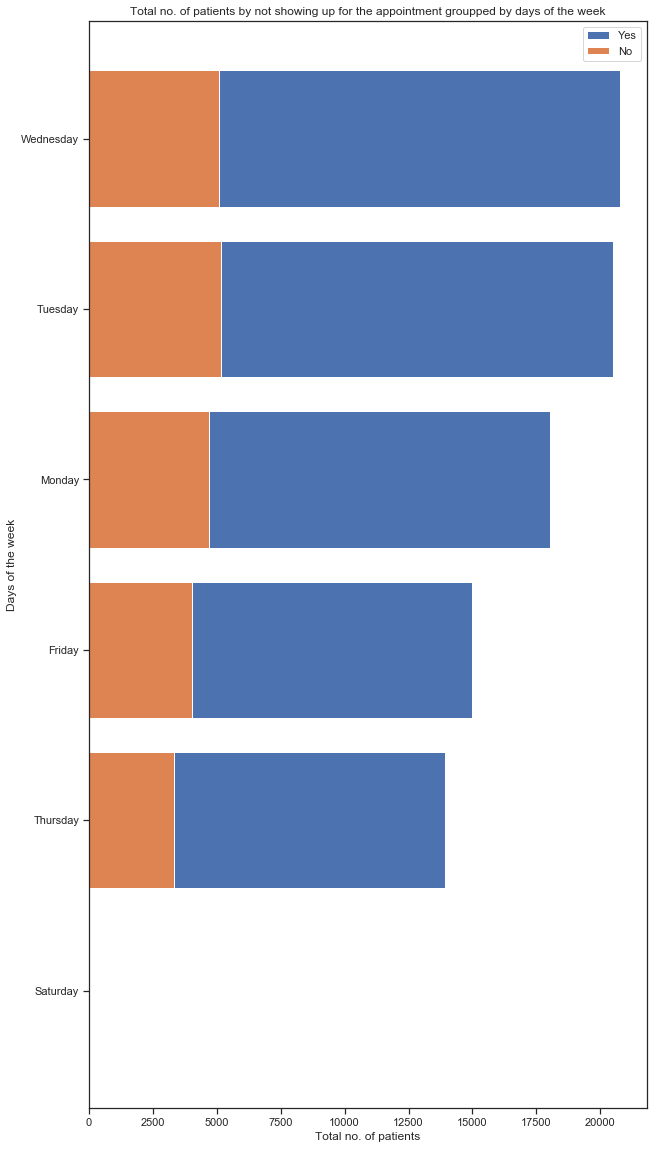

In [40]:
day_groupped = df.groupby(['day', 'no_show']).count().unstack().patient_id
day_groupped["sum"] = day_groupped['No'] + day_groupped['Yes']
day_groupped.sort_values(by="sum", inplace=True)
day_groupped.dropna(inplace=True)

# plotting our data
plt.figure(figsize=(10, 20))

# bar chart
plt.barh(day_groupped.index, day_groupped['No'].values)
plt.barh(day_groupped.index, day_groupped['Yes'].values)

# configs
plt.xlabel("Total no. of patients")
plt.ylabel("Days of the week")
plt.legend(["Yes", "No"])

plt.title("Total no. of patients by not showing up for the appointment groupped by days of the week")

plt.show();

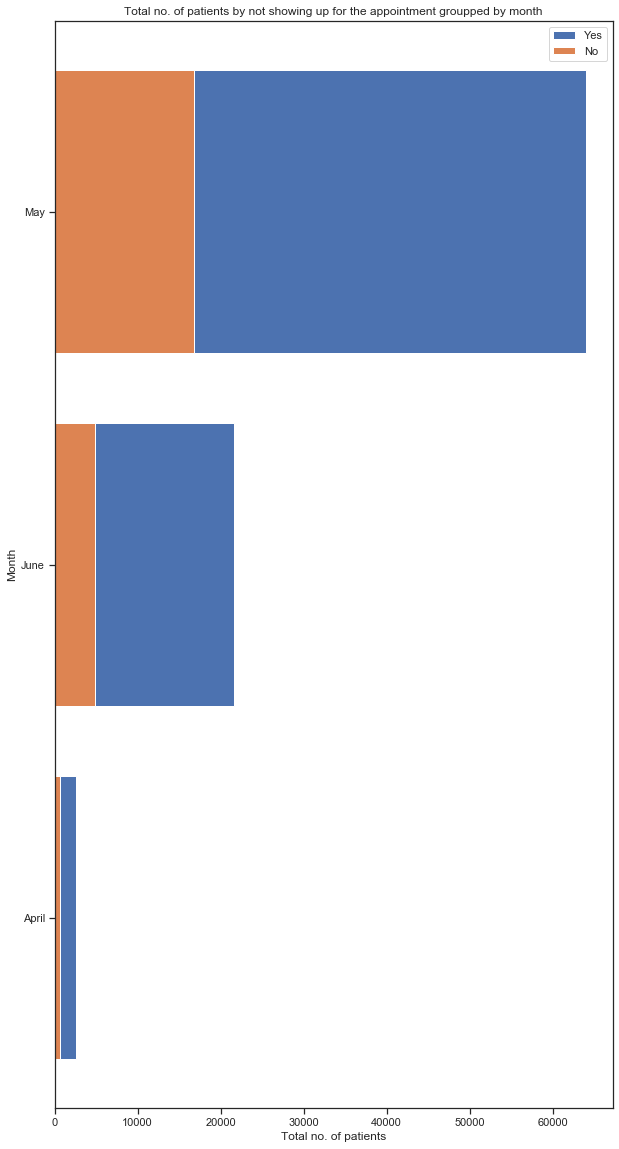

In [41]:
month_groupped = df.groupby(['month', 'no_show']).count().unstack().patient_id
month_groupped["sum"] = month_groupped['No'] + month_groupped['Yes']
month_groupped.sort_values(by="sum", inplace=True)
month_groupped.dropna(inplace=True)

# plotting our data
plt.figure(figsize=(10, 20))

# bar chart
plt.barh(month_groupped.index, month_groupped['No'].values)
plt.barh(month_groupped.index, month_groupped['Yes'].values)

# configs
plt.xlabel("Total no. of patients")
plt.ylabel("Month")
plt.legend(["Yes", "No"])

plt.title("Total no. of patients by not showing up for the appointment groupped by month")

plt.show();

### Dataset/Analysis limitations

During our entire report we faced limitations and challenges.

- Dataset is not properly explained, we have to figure out few things with the help o forum
- No confirmation of the originality of the data, even though it is public services that the author clarified [here](https://www.kaggle.com/joniarroba/noshowappointments/discussion/28825161646)
- There is inconisistency in the data as we are not sure that the data is complete or taken in same quantity region wise.
- Some information like 'handicap' was not clearly stated, as there were 5 posible values in it without explaination, and which we have to figure out on our own later with the help of forum.
- There are a few inconsistences on the dataset that need to be verified for example, negative age values and weird scheduling dates
- There is still posibility of exploring this data more and to get more insights but it can be done with experience.

## Conclusion


There is not a clear conclusion but here are the answers to question according to analysis done above:

1. The most important factor that is influencing the patient to no showing the medical appointment?
  
    - I did not find any specific factor influencing the patient to not showing for the medical appointments, but we have tried to group few variables to get some intersting insights.

After analysing the data provided, I have found some interesting insights which are following:


- Patient ID 
    - There were 48228 duplicated patients ID, which shows people have been taking appointments again and again.
    
- Age
    - There are mor younger people taking appointments as compare to older people, most of the people are of less than age 60.
    
- Waiting time
    - 50 percent of the patients have to wait approximately for 3 days, where as people after 75 percentile has to wait for more than 14 days, with maximum reaching to 178 days.
    
- sms
    - Most of the patient did not receive sms, but this doesnt help us in getting some meaningful information with respect to patietns not showing up for the appointment.

- Gender
     - There is a big difference on the amount of woman attending to consultations compared to the men.

    
- scholarship
    - Very few people had scholarship
